<a href="https://colab.research.google.com/github/harsh43580/Machine-Learning-Models/blob/main/Mechademy_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://raw.githubusercontent.com/Mechademy-Git/DS-Intern-Assignment/refs/heads/main/data/data.csv"
df = pd.read_csv(url)


In [ ]:
df.head()         # First few rows
df.shape          # Rows and columns
df.columns        # Column names
df.info()         # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [ ]:
df.isnull().sum()


,0
timestamp,0
equipment_energy_consumption,844
lighting_energy,809
zone1_temperature,867
zone1_humidity,801
zone2_temperature,853
zone2_humidity,867
zone3_temperature,802
zone3_humidity,878
zone4_temperature,816


In [ ]:
df.describe()


,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [ ]:
# Convert 'timestamp' to datetime (if it's not already)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check if mode() returns NaN, and handle it by replacing with a placeholder if necessary
mode_timestamp = df['timestamp'].mode()[0] if not df['timestamp'].mode().isna().any() else 'Unknown'

# Fill missing values with the mode or a placeholder
df['timestamp'] = df['timestamp'].fillna(mode_timestamp)


In [ ]:
df.isnull().sum()


,0
timestamp,0
equipment_energy_consumption,844
lighting_energy,809
zone1_temperature,867
zone1_humidity,801
zone2_temperature,853
zone2_humidity,867
zone3_temperature,802
zone3_humidity,878
zone4_temperature,816


In [ ]:
# Replace zero values with NaN in the specified columns
columns_to_check = ['zone2_humidity', 'zone3_temperature', 'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
                    'zone5_temperature', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
                    'zone7_humidity', 'zone8_temperature', 'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
                    'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity', 'wind_speed', 'visibility_index',
                    'dew_point', 'random_variable1', 'random_variable2']

df[columns_to_check] = df[columns_to_check].replace(0, np.nan)


In [ ]:
# Convert all columns (except timestamp) to numeric, coerce non-numeric to NaN
df = df.apply(pd.to_numeric, errors='coerce')


In [ ]:
df.fillna(df.median(), inplace=True)


In [ ]:
df.isnull().sum()


,0
timestamp,0
equipment_energy_consumption,0
lighting_energy,0
zone1_temperature,0
zone1_humidity,0
zone2_temperature,0
zone2_humidity,0
zone3_temperature,0
zone3_humidity,0
zone4_temperature,0


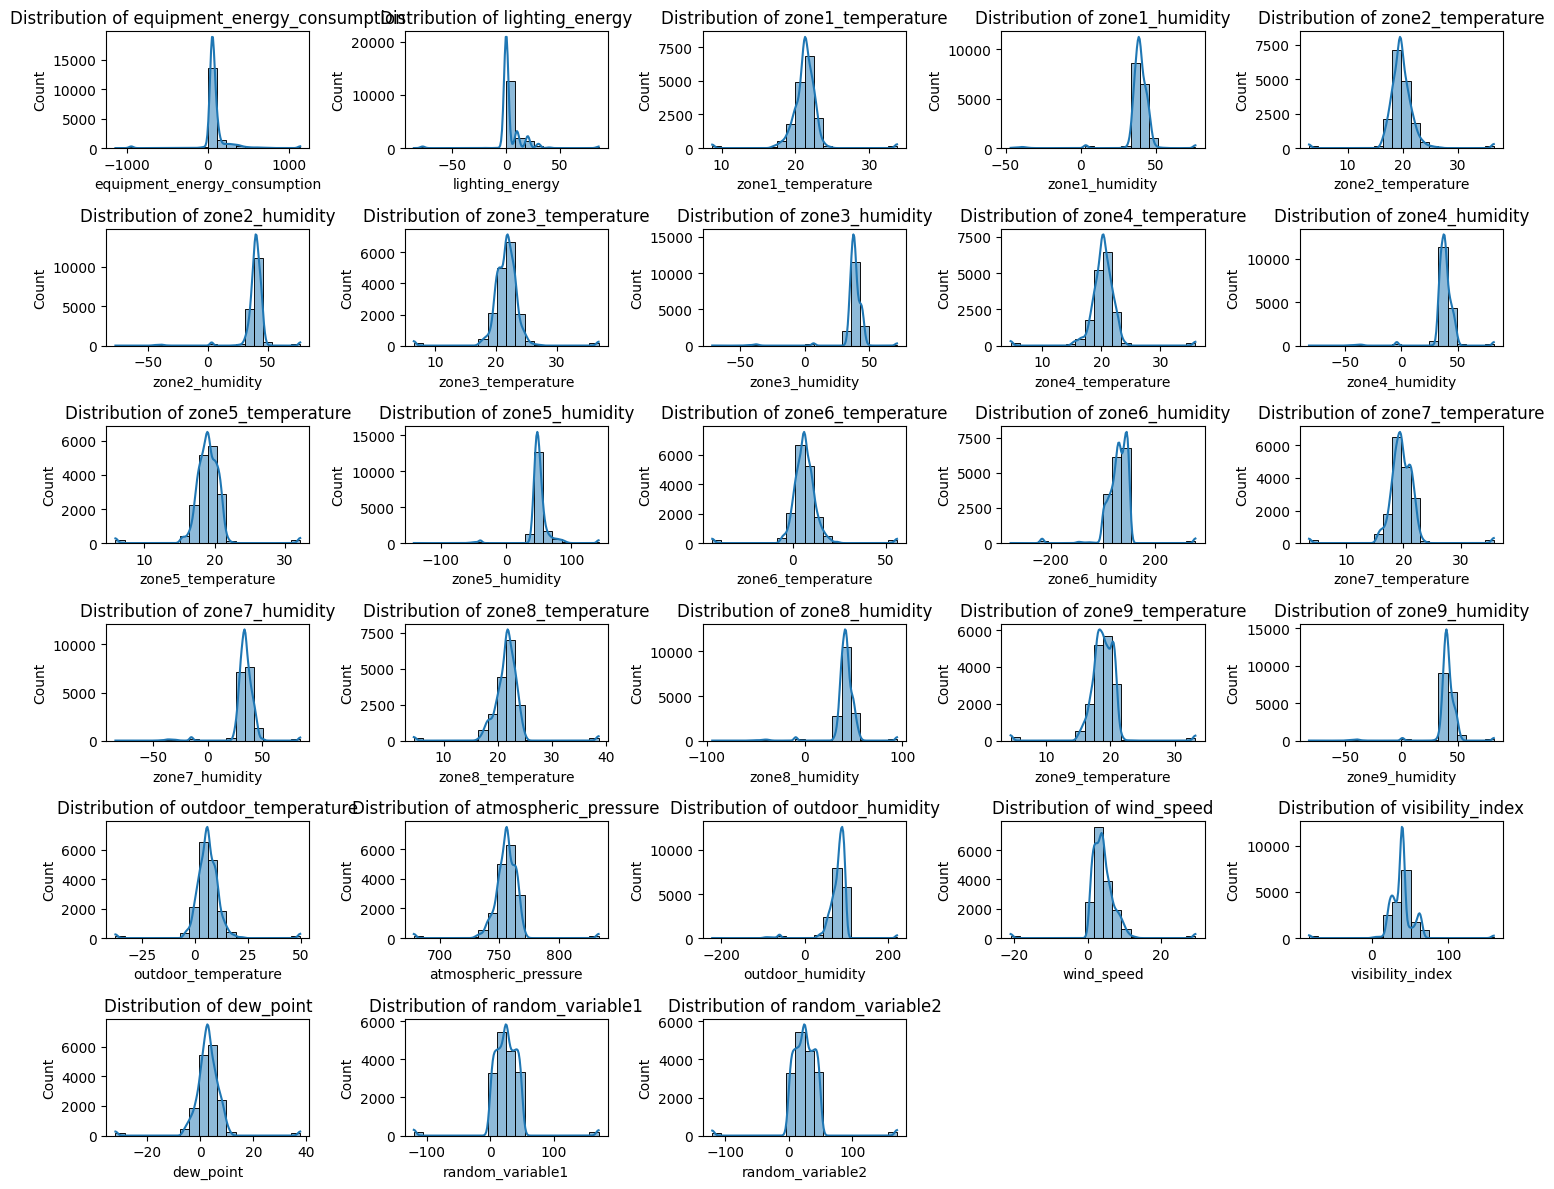

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_columns = ['equipment_energy_consumption', 'lighting_energy',
                     'zone1_temperature', 'zone1_humidity',
                     'zone2_temperature', 'zone2_humidity',
                     'zone3_temperature', 'zone3_humidity',
                     'zone4_temperature', 'zone4_humidity',
                     'zone5_temperature', 'zone5_humidity',
                     'zone6_temperature', 'zone6_humidity',
                     'zone7_temperature', 'zone7_humidity',
                     'zone8_temperature', 'zone8_humidity',
                     'zone9_temperature', 'zone9_humidity',
                     'outdoor_temperature', 'atmospheric_pressure',
                     'outdoor_humidity', 'wind_speed', 'visibility_index',
                     'dew_point', 'random_variable1', 'random_variable2']

# Plot histograms for each numerical column
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 5, i)  # Adjust the subplot grid as per the number of columns
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


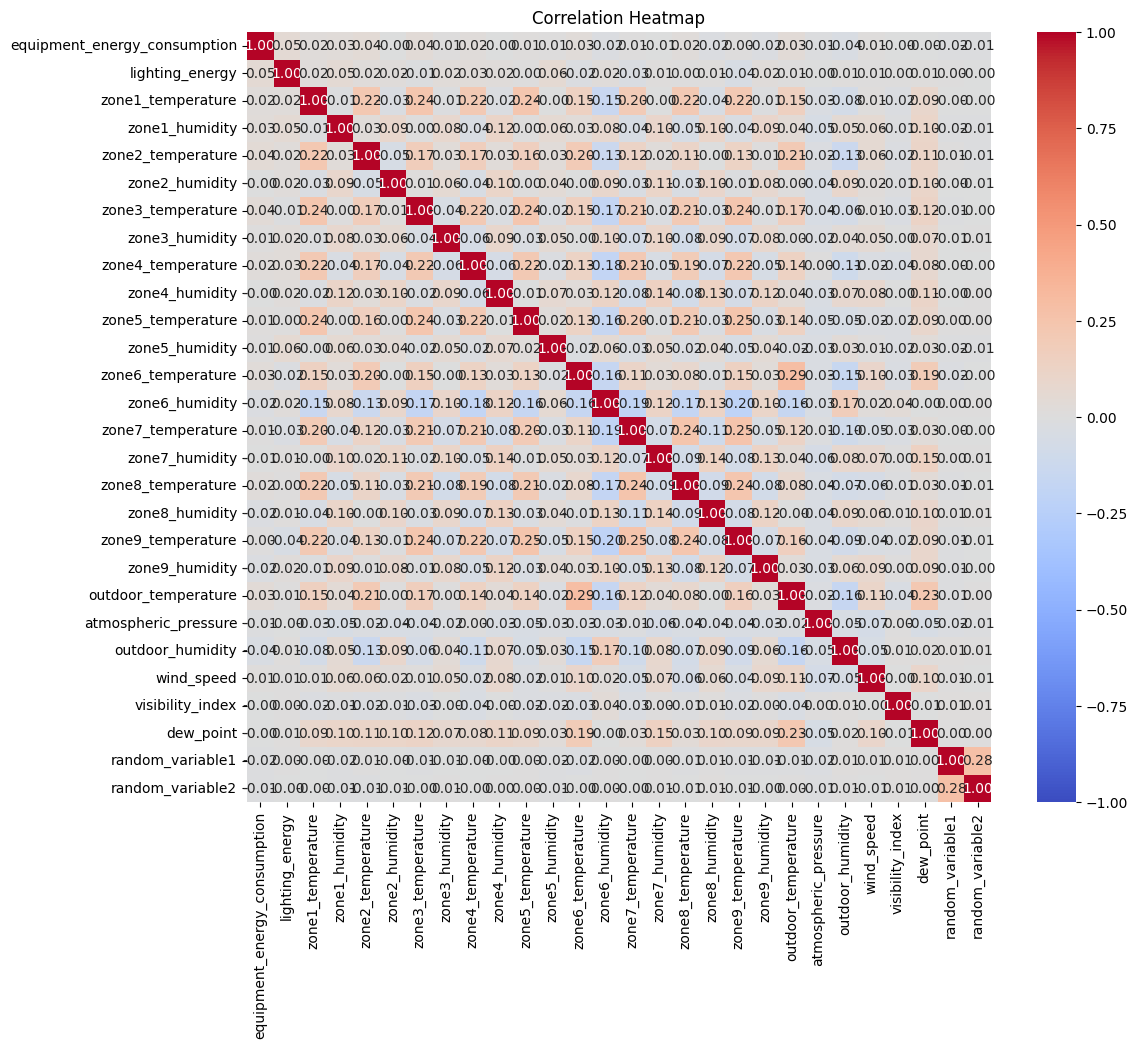

equipment_energy_consumption    1.000000
lighting_energy                 0.053486
zone2_temperature               0.040172
zone3_temperature               0.036205
outdoor_temperature             0.032270
zone6_temperature               0.030604
zone1_humidity                  0.025691
zone8_temperature               0.018371
zone1_temperature               0.017605
zone4_temperature               0.016211
wind_speed                      0.010811
zone5_temperature               0.008360
zone5_humidity                  0.007628
zone7_temperature               0.006962
zone3_humidity                  0.006224
zone9_temperature               0.004275
visibility_index               -0.000266
zone4_humidity                 -0.003298
dew_point                      -0.003721
zone2_humidity                 -0.003767
zone7_humidity                 -0.006740
random_variable2               -0.010301
atmospheric_pressure           -0.012854
random_variable1               -0.015374
zone6_humidity  

In [ ]:
# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Optionally, if you want to specifically see correlation with the target variable
target_correlation = corr_matrix['equipment_energy_consumption'].sort_values(ascending=False)
print(target_correlation)


In [ ]:
# Define a function to detect and cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier capping to the relevant columns
df = cap_outliers(df, 'equipment_energy_consumption')
df = cap_outliers(df, 'lighting_energy')
df = cap_outliers(df, 'zone6_humidity')


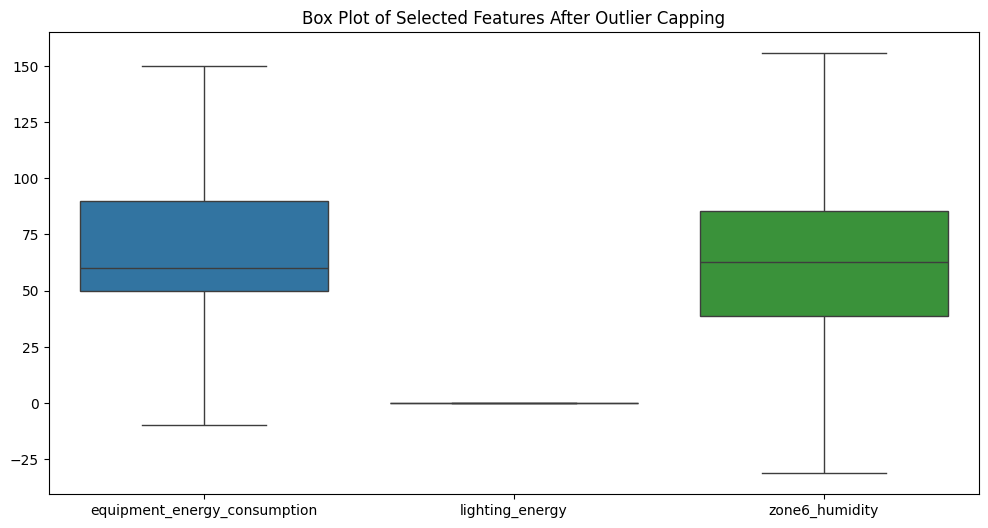

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for a few columns to check the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['equipment_energy_consumption', 'lighting_energy', 'zone6_humidity']])
plt.title("Box Plot of Selected Features After Outlier Capping")
plt.show()


In [ ]:
# Convert timestamp to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract time-based features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['day'] = df['timestamp'].dt.day

# Drop the original timestamp column (optional if you don't need it anymore)
df.drop(columns=['timestamp'], inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the selected numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Verify scaling
df.head()


,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day_of_week,month,year,day
0,-0.355679,0.0,5.938377,0.881741,-0.203522,0.532527,-0.742765,0.019069,-0.457621,0.724000,...,0.654129,1.176421,0.420380,-0.452989,-0.474289,17,0,1,2016,11
1,-0.355679,0.0,-0.648155,0.788485,-0.203522,0.525686,-0.742765,0.666062,-0.457621,0.764490,...,0.576602,0.992116,0.403542,-0.244462,-0.260127,17,0,1,2016,11
2,-0.614851,0.0,-0.648155,0.747880,-0.203522,0.515973,-0.742765,0.680575,5.775323,0.754744,...,0.499074,0.807811,0.386704,0.148143,0.143085,17,0,1,2016,11
3,-0.614851,0.0,5.938377,0.723791,-0.203522,0.512257,-0.742765,0.687325,0.017554,0.738896,...,0.421546,0.623507,5.871539,0.804059,0.816724,17,0,1,2016,11
4,-0.355679,0.0,-0.648155,0.751321,-0.203522,0.506176,-0.742765,0.687325,-0.498140,0.720514,...,0.344018,0.439202,0.353027,-0.577827,-0.602500,17,0,1,2016,11


In [ ]:
# If you have any categorical variables, one-hot encode them
df = pd.get_dummies(df, drop_first=True)


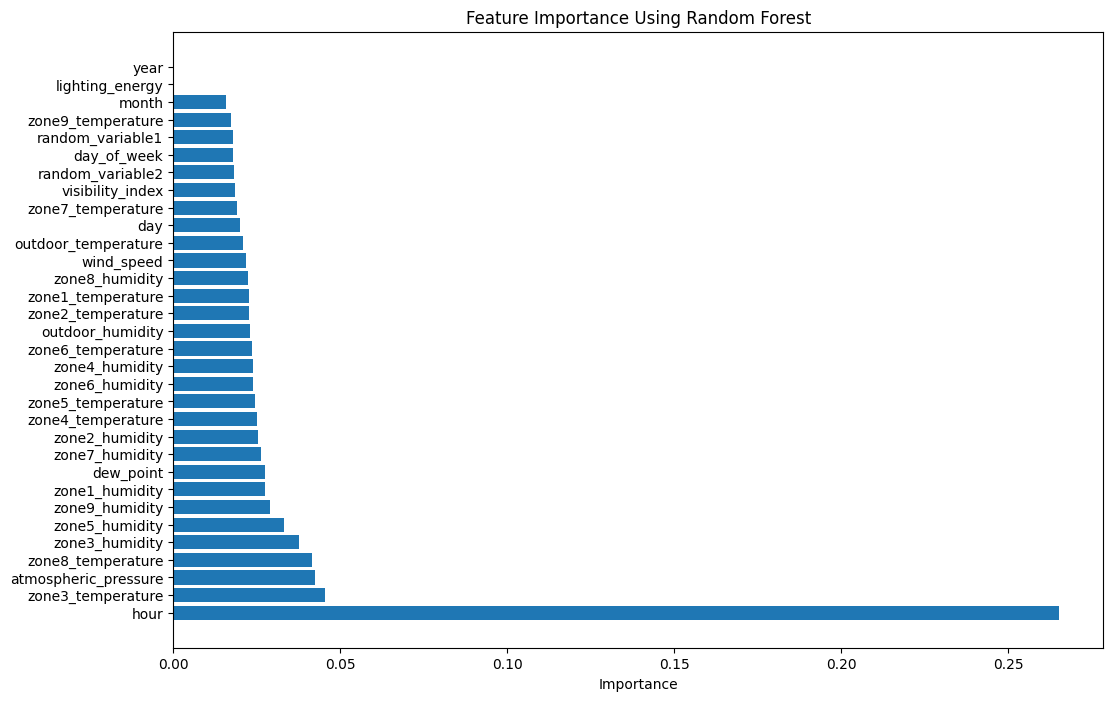

,Feature,Importance
27,hour,0.265117
5,zone3_temperature,0.045376
20,atmospheric_pressure,0.042352
15,zone8_temperature,0.041578
6,zone3_humidity,0.037575
10,zone5_humidity,0.033209
18,zone9_humidity,0.028916
2,zone1_humidity,0.027557
24,dew_point,0.027465
14,zone7_humidity,0.026300


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Define the target variable (you can replace 'equipment_energy_consumption' with your target)
target_variable = 'equipment_energy_consumption'

# Select features (excluding the target variable)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = rf.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Using Random Forest')
plt.show()

# Display feature importance
feature_importance_df


In [ ]:
# Drop irrelevant or low-importance features
features_to_drop = ['random_variable1', 'random_variable2', 'lighting_energy', 'year']
df = df.drop(columns=features_to_drop)


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop('equipment_energy_consumption', axis=1)  # features (drop the target)
y = df['equipment_energy_consumption']  # target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (13485, 28)
Testing data shape: (3372, 28)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.6852904728467083
R-squared: 0.14747444541881993


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Split data into features (X) and target (y)
X = df.drop(columns=['equipment_energy_consumption'])
y = df['equipment_energy_consumption']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.45992056244835466
R-squared: 0.519116575875473


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MAE and R-squared
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


XGBoost MAE: 0.5054735686606205
XGBoost R-squared: 0.45802766895420155


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate MAE and R-squared
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR MAE: {mae_svr}")
print(f"SVR R-squared: {r2_svr}")


SVR MAE: 0.5988332356052236
SVR R-squared: 0.2516763436674603


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Reduce the number of iterations for speed
                                   cv=3,       # Use 3 folds for cross-validation
                                   n_jobs=-1,   # Use all available cores for parallel processing
                                   verbose=2,   # Show progress during the search
                                   scoring='neg_mean_absolute_error',  # Evaluate with MAE
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best MAE Score:", -random_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MAE: {mae}")
print(f"Random Forest R-squared: {r2}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
33 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best Hyperparameters: {'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best MAE Score: 0.4766672146406879
Random Forest MAE: 0.44810816067336134
Random Forest R-squared: 0.5368878261782662


In [ ]:
# Time-based Feature Engineering

# is_weekend: 1 if Saturday (5) or Sunday (6), else 0
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# is_peak_hour: 1 if hour is between 8 AM and 6 PM (inclusive), else 0
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 8 <= x <= 18 else 0)

# is_working_hour: 1 if weekday and between 8 AM to 6 PM
df['is_working_hour'] = df.apply(lambda row: 1 if (row['is_weekend'] == 0 and 8 <= row['hour'] <= 18) else 0, axis=1)

# View updated DataFrame
df[['hour', 'day_of_week', 'is_weekend', 'is_peak_hour', 'is_working_hour']].head()


,hour,day_of_week,is_weekend,is_peak_hour,is_working_hour
0,17,0,0,1,1
1,17,0,0,1,1
2,17,0,0,1,1
3,17,0,0,1,1
4,17,0,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Drop target column and assign features and labels
X = df.drop('equipment_energy_consumption', axis=1)
y = df['equipment_energy_consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain Random Forest
model = RandomForestRegressor(n_estimators=150, min_samples_split=2, min_samples_leaf=2,
                               max_features='log2', max_depth=None, bootstrap=False, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Updated Random Forest MAE: {mae}")
print(f"Updated Random Forest R-squared: {r2}")


Updated Random Forest MAE: 0.4473617919161797
Updated Random Forest R-squared: 0.5384674759652273


In [ ]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[['zone3_temperature', 'zone3_humidity']])


In [ ]:
df['rolling_mean_temp_3'] = df['zone3_temperature'].rolling(window=3).mean()
df['rolling_std_humidity_5'] = df['zone3_humidity'].rolling(window=5).std()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Drop target column and assign features and labels
X = df.drop('equipment_energy_consumption', axis=1)
y = df['equipment_energy_consumption']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Scaling the features with StandardScaler
scaler = StandardScaler()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to handle imputation and scaling
pipeline = make_pipeline(imputer, scaler, RandomForestRegressor(n_estimators=150, min_samples_split=2,
                                                                 min_samples_leaf=2, max_features='log2',
                                                                 max_depth=None, bootstrap=False, random_state=42))

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation scores (optional for additional validation)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_scores.mean()  # Convert negative MAE to positive

# Print the results
print(f"Updated Random Forest MAE: {mae}")
print(f"Updated Random Forest R-squared: {r2}")
print(f"Cross-validated MAE: {mean_cv_mae}")


Updated Random Forest MAE: 0.44151103316772383
Updated Random Forest R-squared: 0.5447516605300042
Cross-validated MAE: 0.6338324005506986
